In [3]:
%load_ext autoreload
%autoreload 2

# Autoreload is important, otherwise .py scripts won't be reloaded after changes.

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import seaborn as sns
import data_loader

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
loader = data_loader.DataLoader()

train_set, test_set = loader.get_data()

In [5]:
train_set.shape, test_set.shape

((891, 12), (418, 11))

In [6]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
train_set['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

array([[<AxesSubplot: xlabel='PassengerId', ylabel='PassengerId'>,
        <AxesSubplot: xlabel='Survived', ylabel='PassengerId'>,
        <AxesSubplot: xlabel='Pclass', ylabel='PassengerId'>,
        <AxesSubplot: xlabel='Age', ylabel='PassengerId'>,
        <AxesSubplot: xlabel='SibSp', ylabel='PassengerId'>,
        <AxesSubplot: xlabel='Parch', ylabel='PassengerId'>,
        <AxesSubplot: xlabel='Fare', ylabel='PassengerId'>],
       [<AxesSubplot: xlabel='PassengerId', ylabel='Survived'>,
        <AxesSubplot: xlabel='Survived', ylabel='Survived'>,
        <AxesSubplot: xlabel='Pclass', ylabel='Survived'>,
        <AxesSubplot: xlabel='Age', ylabel='Survived'>,
        <AxesSubplot: xlabel='SibSp', ylabel='Survived'>,
        <AxesSubplot: xlabel='Parch', ylabel='Survived'>,
        <AxesSubplot: xlabel='Fare', ylabel='Survived'>],
       [<AxesSubplot: xlabel='PassengerId', ylabel='Pclass'>,
        <AxesSubplot: xlabel='Survived', ylabel='Pclass'>,
        <AxesSubplot: xlabel='

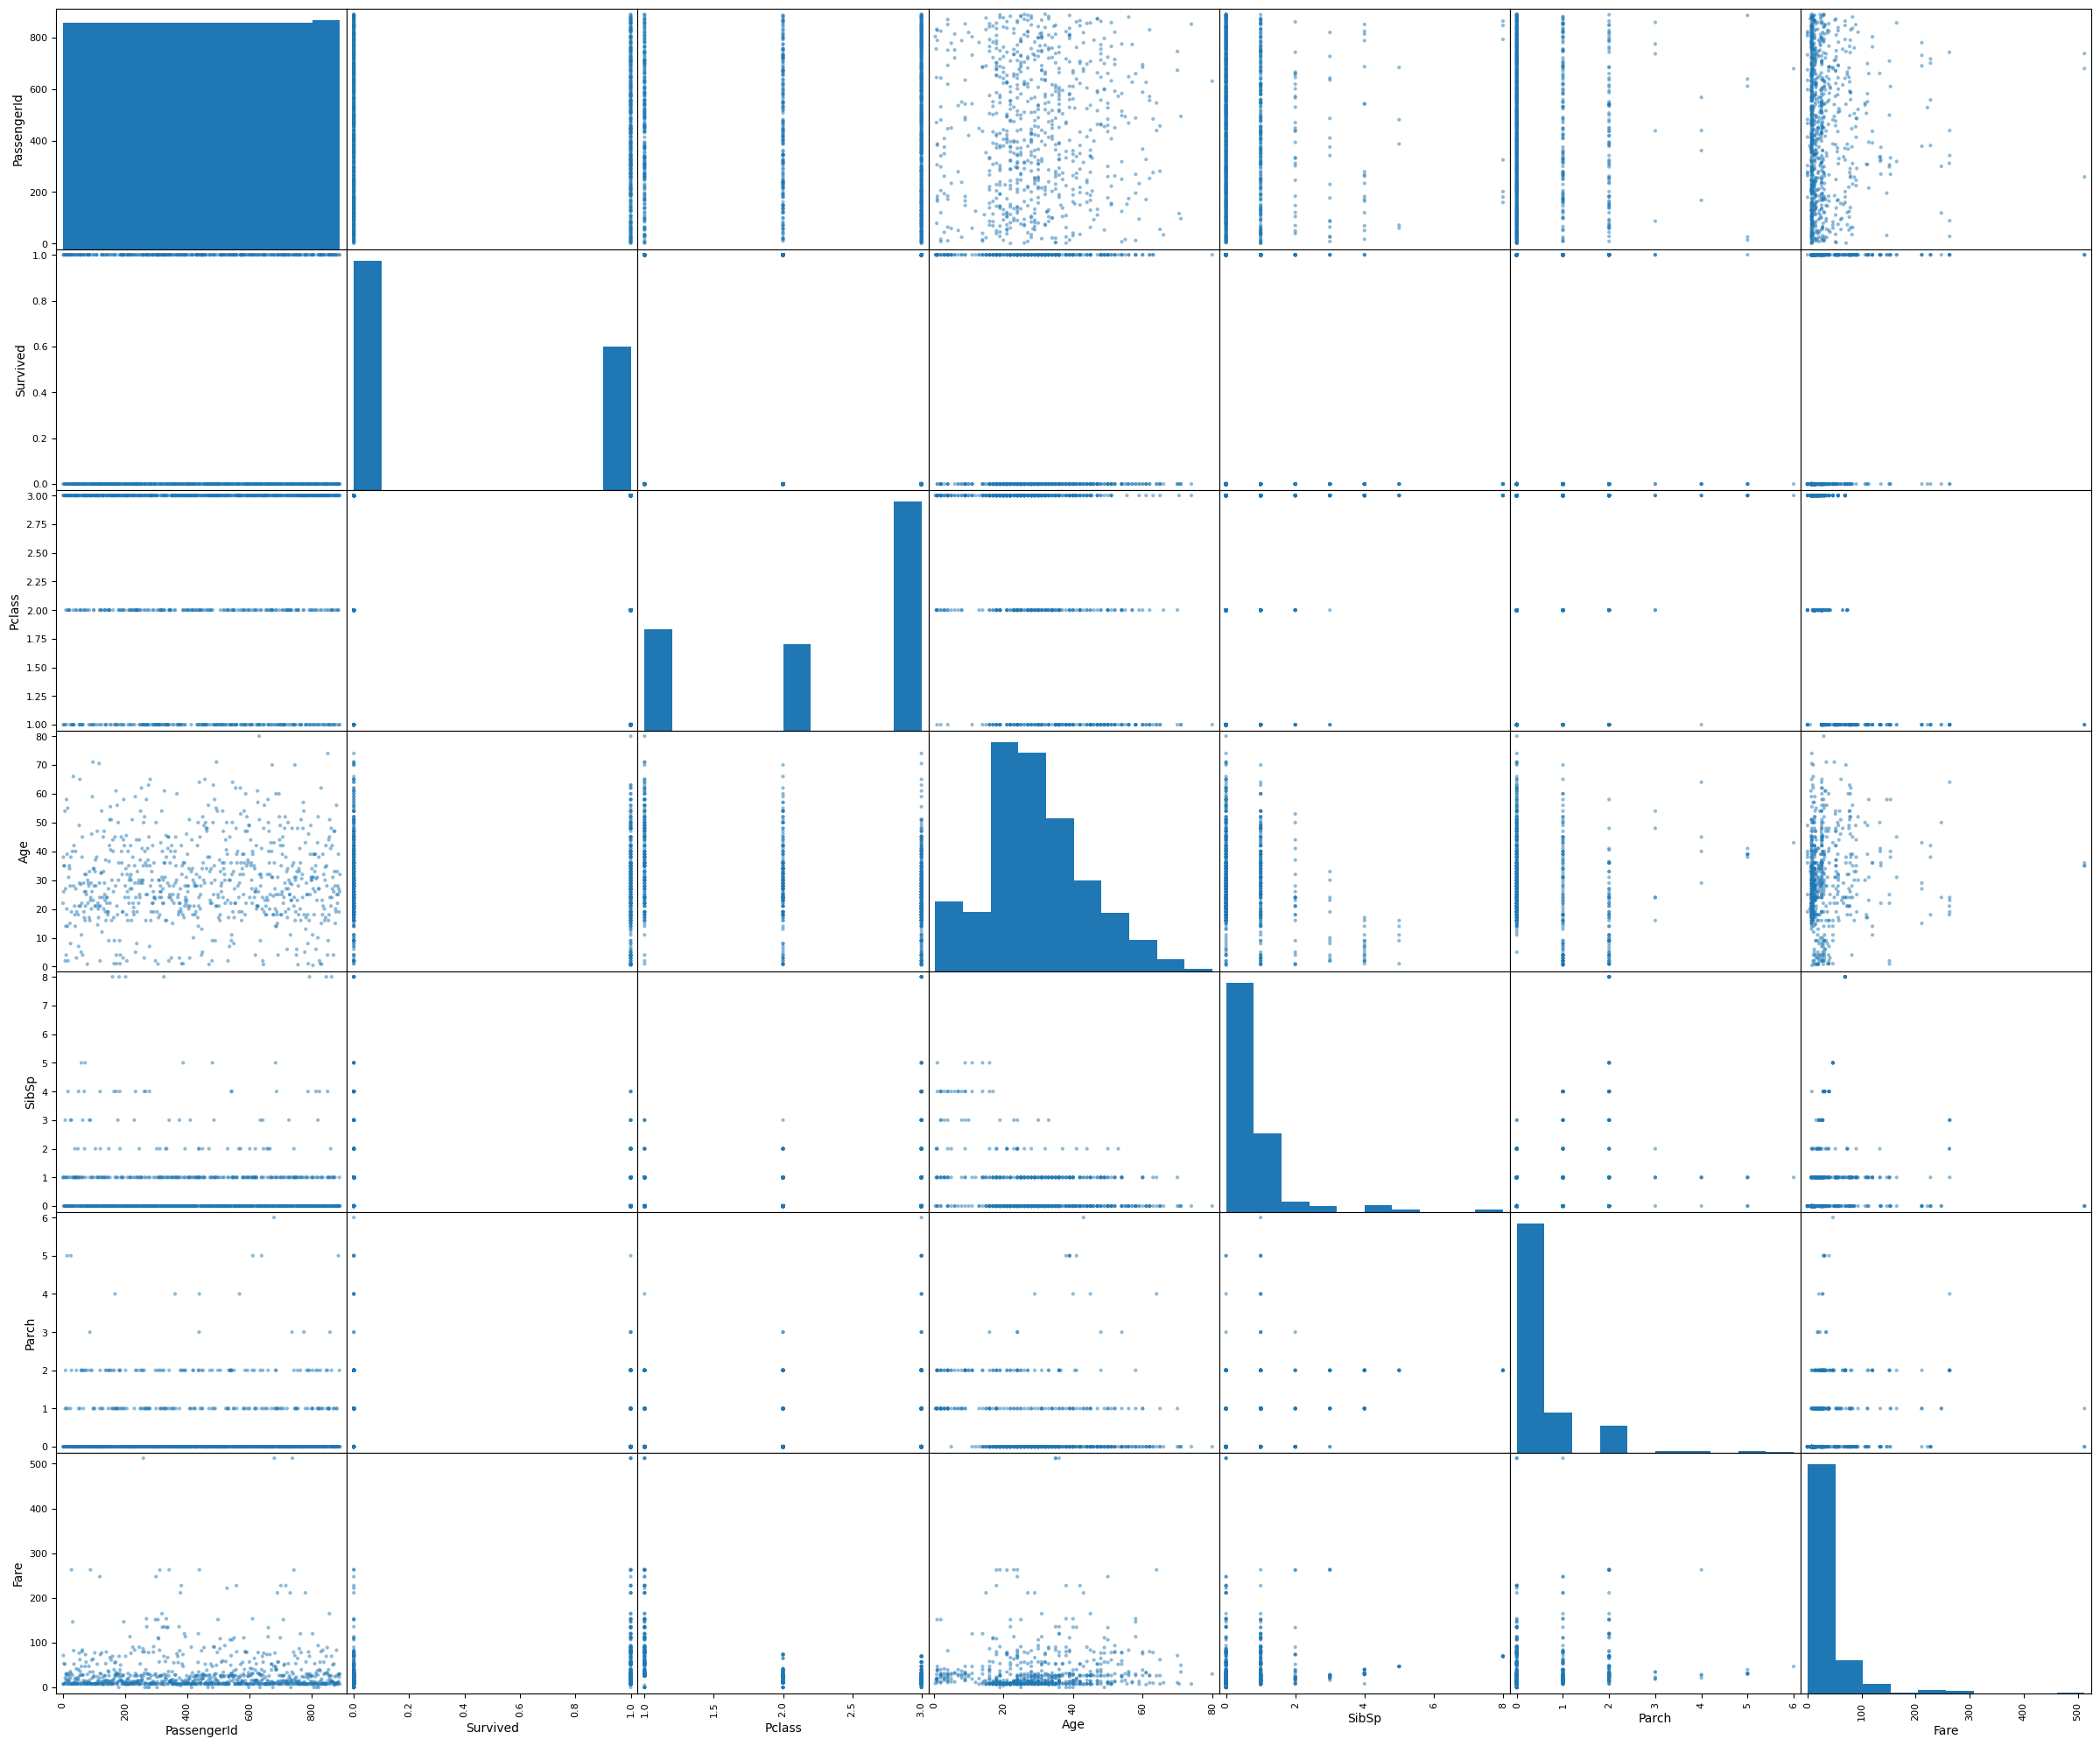

In [14]:
from pandas.plotting import scatter_matrix

scatter_matrix(train_set, figsize=(30, 25))